### Import library yang dibutuhkan

In [1]:
import os
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Mengunduh berkas dataset dalam bentuk .zip

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-12 14:45:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.86MB/s    in 69s     

2020-07-12 14:46:37 (4.45 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



### Mengekstrak berkas dataset .zip

In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Daftar berkas dalam folder rockpaperscissors

In [4]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'paper', 'scissors', 'rock']

Untuk mengetahui banyaknya berkas gambar pada folder

In [5]:
print(len(os.listdir('/tmp/rockpaperscissors/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

726
712
750


### Membuat direktori

In [6]:
# membuat nama direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'valid')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
# menentukan path direktori
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

In [8]:
# membagi direktori masing-masing kelas data menjadi data train dan data validation
train_rock_dir, valid_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.2)
train_paper_dir, valid_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.2)
train_scissors_dir, valid_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.2)

In [9]:
# menentukan path untuk direktori training dan validation masing-masing kelas data
train_rock = os.path.join(train_dir,'rock')
train_paper = os.path.join(train_dir,'paper')
train_scissors = os.path.join(train_dir,'scissors')
valid_rock = os.path.join(validation_dir,'rock')
valid_paper = os.path.join(validation_dir,'paper')
valid_scissors = os.path.join(validation_dir,'scissors')

In [10]:
# membuat direktori baru di dalam direktori train
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

# membuat direktori baru di dalam direktori validation
if not os.path.exists(valid_rock):
  os.mkdir(valid_rock)
if not os.path.exists(valid_paper):
  os.mkdir(valid_paper)
if not os.path.exists(valid_scissors):
  os.mkdir(valid_scissors)

In [11]:
# menyalin data train ke direktori baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

# menyalin data validation ke direktori baru
for i in valid_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(valid_rock,i))
for i in valid_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(valid_paper,i))
for i in valid_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(valid_scissors,i))

Untuk mengetahui banyaknya berkas gambar pada folder

In [12]:
print(len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/valid/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/train/scissors')))
print(len(os.listdir('/tmp/rockpaperscissors/valid/scissors')))
print(len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/valid/paper')))

580
146
600
150
569
143


### Membuat Image Data Generator

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


### Menginisiasi fungsi callback

In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.1):
      print()
      print("akurasi mencapai lebih dari 95%!")
      self.model.stop_training = True

callbacks = myCallback()

### Membuat model

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 256)      

In [39]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

Training data

In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 8s - loss: 1.0979 - accuracy: 0.3938 - val_loss: 1.0147 - val_accuracy: 0.4500
Epoch 2/20
25/25 - 8s - loss: 0.9016 - accuracy: 0.5750 - val_loss: 0.7604 - val_accuracy: 0.6750
Epoch 3/20
25/25 - 8s - loss: 0.6496 - accuracy: 0.7452 - val_loss: 0.4376 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 8s - loss: 0.4177 - accuracy: 0.8450 - val_loss: 0.2530 - val_accuracy: 0.9438
Epoch 5/20
25/25 - 8s - loss: 0.3003 - accuracy: 0.8950 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 8s - loss: 0.2740 - accuracy: 0.9212 - val_loss: 0.1327 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 8s - loss: 0.1935 - accuracy: 0.9388 - val_loss: 0.1874 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 8s - loss: 0.1827 - accuracy: 0.9354 - val_loss: 0.2227 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 8s - loss: 0.2142 - accuracy: 0.9275 - val_loss: 0.2985 - val_accuracy: 0.8625
Epoch 10/20
25/25 - 8s - loss: 0.2062 - accuracy: 0.9325 - val_loss: 0.2272 - val_accuracy: 0.9250
Epoch 11/20
25/25 -

### Visualisasi hasil pada data training dan data validation

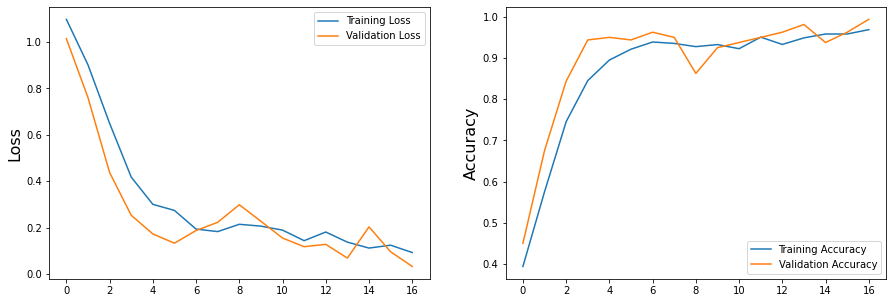

In [44]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Prediksi dengan mengunggah gambar

Saving 2uxDLQKemRqulhIx.png to 2uxDLQKemRqulhIx.png
2uxDLQKemRqulhIx.png
rock


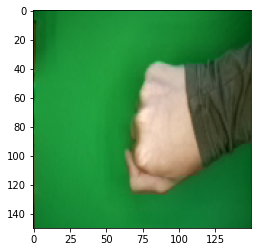

In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')